<a href="https://colab.research.google.com/github/joshuadollison/MAT-422/blob/main/MAT422_83348_HW2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# **2.4.1. MLE for random samples**

According to the class notes, maximum likelihood estimation (MLE) is an effective approach of estimating the parameters of a probability distribution through maximizing a likelihood function. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible. As a result, the method has become a dominant means of statistical inference

The example below simulates a real-world application and estimates the mean and variance of a normal distribution from a random sample (e.g., heights of people) using MLE. The results are visualized as a histogram of the sample data and the corresponding normal distribution.

MLE for the mean: 168.96 cm
MLE for the variance: 81.65 cm^2


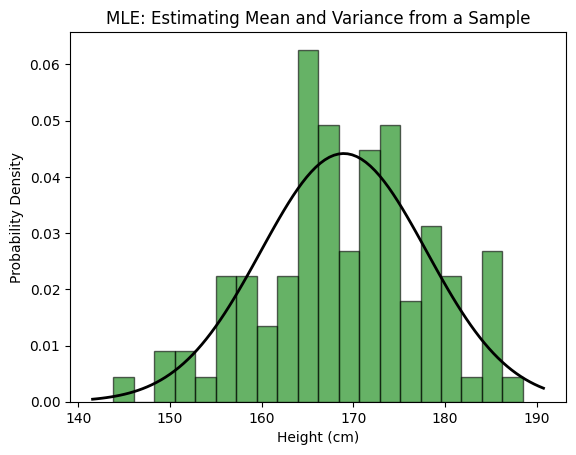

In [2]:
# Generate a random sample of heights from a normal distribution
np.random.seed(42)
mean_height = 170  # True mean in cm
std_dev_height = 10  # True standard deviation in cm
sample_size = 100

# Generate sample data
sample_heights = np.random.normal(mean_height, std_dev_height, sample_size)

# MLE for the mean and variance
mle_mean = np.mean(sample_heights)
mle_variance = np.var(sample_heights, ddof=0)

print(f"MLE for the mean: {mle_mean:.2f} cm")
print(f"MLE for the variance: {mle_variance:.2f} cm^2")

# Plot the sample data and the estimated normal distribution
plt.hist(sample_heights, bins=20, density=True, alpha=0.6, color='g', edgecolor='k')

# Plot the estimated normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1 / (np.sqrt(2 * np.pi * mle_variance))) * np.exp(-0.5 * ((x - mle_mean) ** 2) / mle_variance)
plt.plot(x, p, 'k', linewidth=2)

plt.title('MLE: Estimating Mean and Variance from a Sample')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.show()


# **2.4.2. Linear regression**
On their site, IBM states that linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.

The class notes state that, given input data points $\{(x_i,y_i)\}^{n}_{i=1}$, we seek an aﬀine function to fit the data and each $x_i = (x_{i1},....,x_{ip})$. The common approach involves finding coeﬀicients $\beta_j, j = 1..., p$'s that minimize the criterion where $\sum^n_{i=1} (y_i = \hat{y}_i)^2$ where $\hat{y} = \beta_0 + \beta_{1}x_{i1} + ... + \beta_{p}x_{ip}$.

Below I provide simulations of two real-world applications.  The first performs simple linear regression to predict house prices based on square footage. The relationship between house prices and square footage is visualized using a scatter plot and a fitted regression line.

The second demonstrates multiple linear regression for predicting car prices based on multiple features (mileage and engine size). It shows how to fit the model, calculate coefficients, and visualize the predicted vs actual car prices.

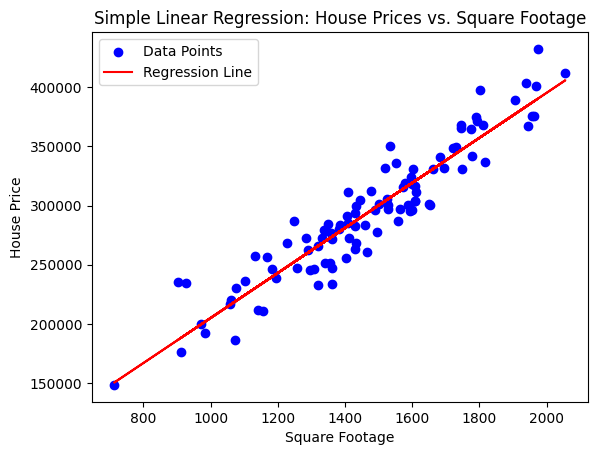

Slope (b1): 190.45
Intercept (b0): 14474.27


In [3]:
# Simulated data: Square footage (independent variable) and house prices (dependent variable)
np.random.seed(42)
square_footage = np.random.normal(1500, 300, 100)  # Square footage of houses
house_prices = square_footage * 200 + np.random.normal(0, 20000, 100)  # Prices are roughly proportional to square footage

# Perform linear regression
X = square_footage
Y = house_prices
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Calculate slope (b1) and intercept (b0)
b1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2)
b0 = Y_mean - b1 * X_mean

# Predicted house prices based on the linear regression model
Y_pred = b0 + b1 * X

# Plot the data and the regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression: House Prices vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.legend()
plt.show()

print(f"Slope (b1): {b1:.2f}")
print(f"Intercept (b0): {b0:.2f}")


Intercept (b0): 18039.17
Coefficient for mileage (b1): -0.05
Coefficient for engine size (b2): 2950.89


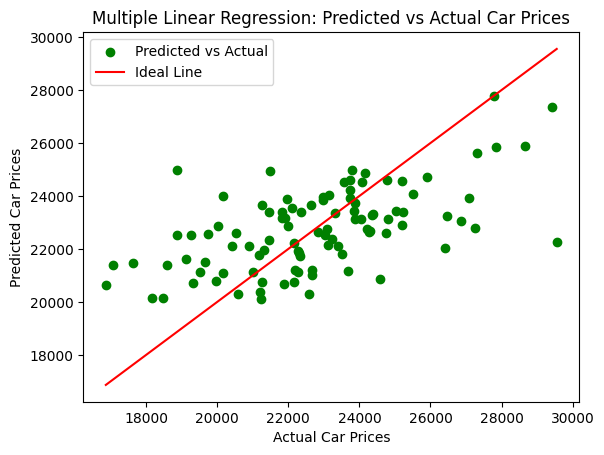

In [4]:
# Simulated data: Mileage, engine size, and car prices
np.random.seed(42)
mileage = np.random.normal(50000, 10000, 100)  # Mileage of cars
engine_size = np.random.normal(2.5, 0.5, 100)  # Engine size in liters
car_prices = 20000 - (mileage * 0.1) + (engine_size * 3000) + np.random.normal(0, 2000, 100)  # Car prices depend on mileage and engine size

# Combine independent variables (mileage and engine size) into a matrix
X = np.column_stack((mileage, engine_size))
Y = car_prices

# Perform multiple linear regression
model = LinearRegression()
model.fit(X, Y)

# Predicted car prices based on the model
Y_pred = model.predict(X)

# Coefficients of the regression model
b0 = model.intercept_  # Intercept
b1, b2 = model.coef_  # Coefficients for mileage and engine size

print(f"Intercept (b0): {b0:.2f}")
print(f"Coefficient for mileage (b1): {b1:.2f}")
print(f"Coefficient for engine size (b2): {b2:.2f}")

# Plot the true vs predicted car prices
plt.scatter(Y, Y_pred, color='green', label='Predicted vs Actual')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', label='Ideal Line')
plt.title('Multiple Linear Regression: Predicted vs Actual Car Prices')
plt.xlabel('Actual Car Prices')
plt.ylabel('Predicted Car Prices')
plt.legend()
plt.show()
